In [2]:
# importing libraries
import webget, pandas as pd, matplotlib.pyplot as plt, numpy as np
import csv, os, collections as col
from urllib.parse import urlparse

file = "AviationDataset.csv"

with open(file) as file_object: # opening the csv
    reader = csv.reader(file_object) # returns reader object that reads lines in file
    header_row = next(reader) # first getting the headers line and so-on/next line

    for i, v in enumerate(header_row): # starting from headers row returns a tuple containing a count 
        print(i, v)


0 Event.Id
1 Investigation.Type
2 Accident.Number
3 Event.Date
4 Location
5 Country
6 Latitude
7 Longitude
8 Airport.Code
9 Airport.Name
10 Injury.Severity
11 Aircraft.Damage
12 Aircraft.Category
13 Registration.Number
14 Make
15 Model
16 Amateur.Built
17 Number.of.Engines
18 Engine.Type
19 FAR.Description
20 Schedule
21 Purpose.of.Flight
22 Air.Carrier
23 Total.Fatal.Injuries
24 Total.Serious.Injuries
25 Total.Minor.Injuries
26 Total.Uninjured
27 Weather.Condition
28 Broad.Phase.of.Flight
29 Report.Status
30 Publication.Date


In [3]:
database = pd.read_csv(file)

def nan_to_0(database):
    return database.fillna(0.0)

no_nan_data = nan_to_0(database)
data = np.array(no_nan_data)
# database # prints the table

In [39]:
# 1.How do the flight phases contribute to fatalities? Chart!
%matplotlib inline
col28 = data[:, 28]
col23 = data[:, 23]

fatal = []
for el in col23:
    if el != 0.0:
        fatal.append(el)
    else:
        pass

phase = []
for e in col28:
    if e != 0.0:
        phase.append(e)
    else:
        pass



Most injuries in the US where in these 5 locations:


AssertionError: incompatible sizes: argument 'height' must be length 79293 or scalar

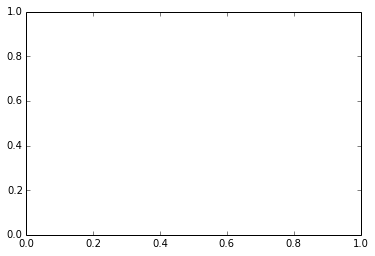

In [37]:
# 2.Which 5 locations saw the most injuries in the US? Barchart!

col4 = data[:, 4] # location
col5 = data[:, 5] # country

location = []
for el in col4:
    if el != 0.0:
        location.append(el)
    else:
        pass

usa = []
for e in col5:
    if e == "United States":
        usa.append(e)
    else:
        pass

minor = data[:, 25]
serious = data[:, 24]
fatal.sort()
top5 = []

print("Most injuries in the US where in these 5 locations:")

plt.bar(minor, location, width=0.5, linewidth=1, align='center')
plt.axis([0, max(minor) + 5, 0, 400])
title = "Minor injuries in locations"
plt.title(title, fontsize=12)
plt.xlabel("Minor injuries", fontsize=10)
plt.ylabel("Location", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [6]:
# 3.Which 5 aircraft models had the most injuries? piechart!

col15 = data[:, 15]
models = []
for e in col15:
    if e != 0.0:
        models.append(e)
    else:
        pass

print("max fatal: ")
print(max(fatal))
print("max serious: ")
print(max(serious))
print("max minor: ")
print(max(minor))

max fatal: 
349.0
max serious: 
111.0
max minor: 
380.0


In [ ]:
# What was the distribution of fatal injuries during the last 20 years? 
# Show it on a barchart!